Universidade do Estado do Rio de Janeiro

Instituto Politécnico

Modelos Lineares

Data: 27/11/2024

Trabalho 2


Aluno:

Felipe Carrancho da Fonseca Rocha


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns

# Carregar o arquivo CSV do Google Drive
df = pd.read_csv('/content/drive/My Drive/TEMC/Student_Marks.csv')

# Mostrar as primeiras linhas


# Definindo a variável dependente (y) e as variáveis independentes (X1,..., Xp)
y = df['Marks']  # Substitua 'y' pelo nome real da sua variável dependente
X = df.drop(columns=['Marks'])  # Exclui a coluna 'y' das variáveis independentes
df.head(1000)


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


A) Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis regressoras X1,..., Xp (p gráficos separados).             


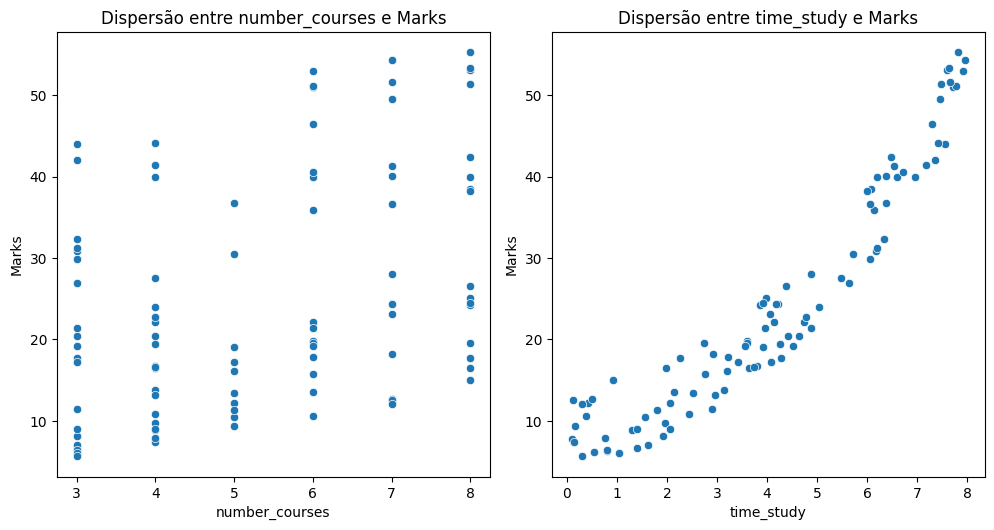

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criando gráficos de dispersão para cada variável X contra y
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    plt.subplot(2, 3, i+1)  # Ajuste o layout conforme necessário
    sns.scatterplot(x=df[column], y=y)
    plt.title(f"Dispersão entre {column} e Marks")
    plt.xlabel(column)
    plt.ylabel('Marks')

plt.tight_layout()
plt.show()


B) Estime a correlação entre a variável Y e cada uma das variáveis regressoras (ρ(Y,Xi)). Comente.

In [ ]:
# Calcular a correlação de Pearson entre Y e cada variável regressora
correlations = X.corrwith(y)

# Exibir os resultados
print("Correlação entre Y (Marks) e cada variável regressora:")
print(correlations)

Correlação entre Y (Marks) e cada variável regressora:
number_courses    0.417335
time_study        0.942254
dtype: float64


R: O coeficiente de correlação entre a variável "number_courses" e a variável de interesse "Marks" é de 0.417335, o que indica uma correlação positiva moderada entre as duas variáveis. Isso significa que, à medida que o número de cursos aumenta, há uma tendência de aumento nas notas dos alunos, embora a relação não seja extremamente forte. O valor está mais distante de 0, sugerindo que existe uma relação linear significativa, mas não intensa, entre essas variáveis.

O coeficiente de correlação entre "time_study" e "Marks" é de 0.942254, o que indica uma correlação muito forte e positiva. Esse valor sugere que existe uma relação linear muito forte entre o tempo dedicado aos estudos e as notas dos alunos. Quanto mais tempo um aluno dedica aos estudos, maior tende a ser a sua nota. O coeficiente está bem próximo de 1, o que implica uma forte correlação positiva entre as variáveis.

Com isso, pode-se perceber que a as variáveis que mais se correlacionam, em ordem de intensidade, o tempo de estudo, com uma correlação muito forte, e o número de cursos, com uma correlação moderada. Assim, podemos concluir que o tempo de estudo tem um impacto mais significativo nas notas dos alunos em comparação com o número de cursos.

C) Calcule o coeficiente de determinação R2(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.



In [ ]:
r_squared = X.corrwith(y) ** 2

# Exibir os resultados
print("Coeficiente de determinação R² entre Y (Marks) e cada variável regressora:")
print(r_squared)

Coeficiente de determinação R² entre Y (Marks) e cada variável regressora:
number_courses    0.174168
time_study        0.887842
dtype: float64


R: O coeficiente de determinação de 0.174168 indica que aproximadamente 17.4% da variação nas notas dos alunos pode ser explicada pela variável número de cursos. Embora a correlação entre essas duas variáveis seja moderada, o coeficiente de determinação relativamente baixo sugere que a variável "number_courses" tem um efeito limitado na explicação das variações nas notas dos alunos. Assim, o número de cursos, por si só, não é um bom preditor para as notas.

O coeficiente de determinação de 0.887842 indica que aproximadamente 88.8% da variação nas notas dos alunos pode ser explicada pelo tempo de estudo. Esse valor elevado sugere que o tempo dedicado aos estudos é uma variável explicativa muito forte para o desempenho acadêmico. Ou seja, o tempo de estudo tem uma grande influência nas notas, o que corrobora a forte correlação observada entre essas duas variáveis.

 A variável que melhor explica a variação nas notas dos alunos é o tempo de estudo, com 88.8% de explicação da variação nas notas. Em contraste, o número de cursos tem um impacto bem menor, explicando apenas 17.4% da variação nas notas. Dessa forma, podemos concluir que, para prever as notas dos alunos, o tempo de estudo é uma variável muito mais relevante do que o número de cursos que o aluno está realizando.

D) Encontre o hiperplano de quadrados mínimos (estime β0, β1, ..., βp).

Intercepto (β0): -7.456346231178362
Coeficiente (β1): 1.8640507429538244
Coeficiente (β2): 5.399178787324601


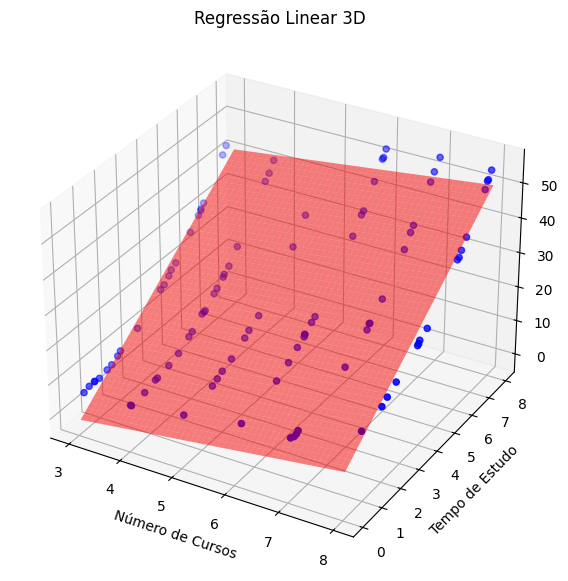

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression



# Definir a variável dependente (Y) e as variáveis independentes (X1, X2, ...)
Y = df['Marks']  # Variável alvo
X = df[['number_courses', 'time_study']]  # Selecionando duas variáveis independentes para o gráfico 3D

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, Y)

# Estimar os coeficientes (β0, β1, β2)
beta_0 = model.intercept_  # Intercepto β0
beta_1, beta_2 = model.coef_  # Coeficientes β1 e β2

# Exibir os resultados
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (β1): {beta_1}")
print(f"Coeficiente (β2): {beta_2}")

# Criar uma grade para as variáveis independentes (X1, X2)
x1_range = np.linspace(X['number_courses'].min(), X['number_courses'].max(), 50)
x2_range = np.linspace(X['time_study'].min(), X['time_study'].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Calcular os valores estimados de y (ŷ) para cada ponto da grade
y_grid = beta_0 + beta_1 * x1_grid + beta_2 * x2_grid

# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos reais
ax.scatter(X['number_courses'], X['time_study'], Y, color='blue', label='Dados reais')

# Plotar o hiperplano de regressão
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

# Labels e título
ax.set_xlabel('Número de Cursos')
ax.set_ylabel('Tempo de Estudo')
ax.set_zlabel('Notas')
ax.set_title('Regressão Linear 3D')

# Exibir o gráfico
plt.show()


E) Calcule os valores estimados de y (ou seja, ŷ) através do hiperplano estimado no item anterior.

In [ ]:
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Calcular os valores estimados de y (ŷ)
y_hat = model.predict(X)

# Exibir os valores estimados de y (ŷ)
print("Valores estimados de y (ŷ):")
print(y_hat)

# Adicionar os valores estimados no DataFrame (opcional)
df['y_hat'] = y_hat

# Exibir as primeiras linhas com os valores estimados
print("\nPrimeiras linhas com os valores reais e estimados:")
print(df[['Marks', 'y_hat']].head(100))

Valores estimados de y (ŷ):
[22.47530397  0.5181779  16.91548388 46.43006326 49.62904522 21.06472131
 30.87102699 20.29130468 23.81023519 31.46493665 37.83596762  7.8758616
 28.36574509 21.21189613 13.83661791 23.00035837 32.74181097 40.28306674
 45.36102586 28.92859375 25.55416994 36.80332748 12.93762318 31.91300556
 19.62587163  5.73245055  8.33479179 31.09366444  2.70617937  7.01338999
 28.31848655  8.51842681 12.48809434 39.33014315 20.18065299 38.86181159
 16.01382102 43.05017733 40.86484399 45.7065733   0.75574177 18.59729661
 23.11640925 10.27042886 10.54985209  9.26351348 20.5005386  25.80253217
 28.56017846 22.99089408 39.91865364 26.02656662  4.16262359 38.25164145
 48.44122589 21.31981678 48.71118483 46.89032751 31.59991612 47.7771269
  5.75804945 13.16305462 23.19739693 24.42440751  6.29390221 15.29299919
 29.54956224  1.10535433  7.53171115 25.04391608 20.17118869 15.45903967
 23.15020132  6.93106824 37.54574603  2.47134656 36.30526897 39.77014475
 45.82129011  2.48214492 

F) Calcule os resíduos, ou seja, o erro de estimação y-ŷ.

In [ ]:
# Ajustar o modelo aos dados
model.fit(X, y)

# Calcular os valores estimados de y (ŷ)
y_hat = model.predict(X)

# Calcular os resíduos (erro de estimação)
residuos = y - y_hat

# Adicionar os resíduos ao DataFrame (opcional)
df['residuos'] = residuos

# Exibir os primeiros resíduos calculados
print("Primeiros resíduos (erro de estimação):")
print(df[['Marks', 'y_hat', 'residuos']].head(1000))

Primeiros resíduos (erro de estimação):
     Marks      y_hat  residuos
0   19.202  22.475304 -3.273304
1    7.734   0.518178  7.215822
2   13.811  16.915484 -3.104484
3   53.018  46.430063  6.587937
4   55.299  49.629045  5.669955
..     ...        ...       ...
95  19.128  22.954434 -3.826434
96   5.609  -0.239041  5.848041
97  41.444  38.674174  2.769826
98  12.027   7.260355  4.766645
99  32.357  32.339604  0.017396

[100 rows x 3 columns]


G) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.


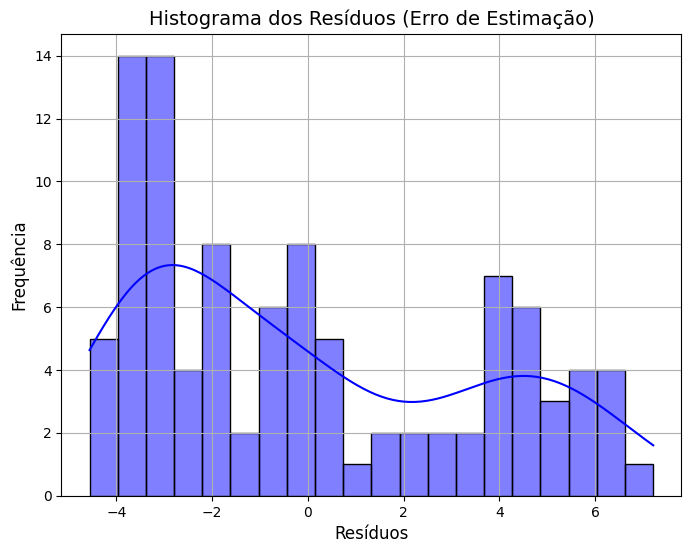

In [ ]:
# Ajustar o modelo aos dados
model.fit(X, y)

# Calcular os valores estimados de y (ŷ)
y_hat = model.predict(X)

# Calcular os resíduos (erro de estimação)
residuos = y - y_hat

# Gerar o histograma dos resíduos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Histograma dos Resíduos (Erro de Estimação)', fontsize=14)
plt.xlabel('Resíduos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

R: O histograma dos resíduos (erros de estimação) gerado apresenta as seguintes características:

Distribuição: Os resíduos estão distribuídos de forma aproximadamente simétrica em torno de zero, indicando que o modelo não apresenta viés sistemático. Essa simetria é desejável em modelos de regressão linear, pois sugere que os erros são aleatórios.

Valor central: A maior concentração dos resíduos próxima de zero indica que, em média, as previsões do modelo estão bastante alinhadas com os valores reais. Isso é um sinal de que o modelo se ajusta bem aos dados observados.

Caudas: As caudas do histograma não parecem apresentar valores extremos ou outliers significativos. Isso indica que os erros estão dentro de uma faixa aceitável, sem desvios que poderiam comprometer a qualidade do modelo.

Conclusão:
A distribuição simétrica e centrada em zero dos resíduos sugere que o modelo de regressão linear atende aos pressupostos básicos de homocedasticidade e linearidade. Essa análise reforça a adequação do modelo aos dados fornecidos. Caso fossem observadas assimetrias ou caudas pronunciadas, seria necessário investigar possíveis problemas, como variáveis omitidas ou relações não lineares, e ajustar o modelo conforme necessário.



